In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('~/PycharmProjects/algo_trading/finance/my_portfolio/my_portfolio.csv')

In [3]:
price_df = pd.pivot(df, values='Close', index='Date', columns='Ticker')
vol_df = pd.pivot(df, values='Volume', index='Date', columns='Ticker')

In [4]:
price_df

Ticker,0354.HK,0650.HK,6608.HK
Date,,,
2021-06-01,9.88,1.060,23.000000
2021-06-02,9.84,1.010,22.600000
2021-06-03,9.62,1.010,21.900000
2021-06-04,9.85,1.000,21.799999
2021-06-07,10.94,1.000,21.500000
...,...,...,...
2024-05-27,4.41,0.330,9.650000
2024-05-28,4.36,0.365,9.500000
2024-05-29,4.10,0.345,9.370000


In [5]:
vol_df

Ticker,0354.HK,0650.HK,6608.HK
Date,,,
2021-06-01,27768542,380000,2164500
2021-06-02,38987634,305500,866500
2021-06-03,47967413,0,952000
2021-06-04,18297692,84000,934000
2021-06-07,51797543,138000,617000
...,...,...,...
2024-05-27,13887770,56952000,1061000
2024-05-28,10038000,295079000,949000
2024-05-29,52994000,76244000,949000


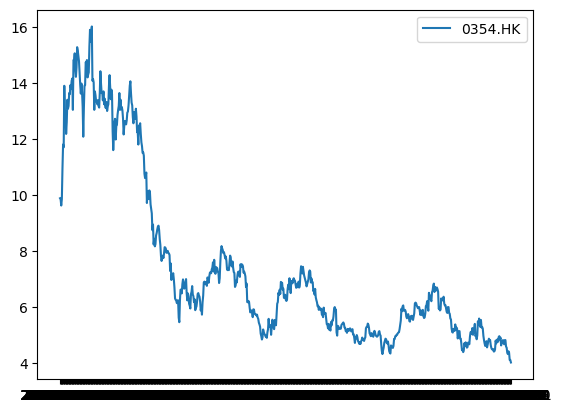

In [6]:
plt.plot(price_df['0354.HK'], label='0354.HK')
plt.legend()
plt.show()

In [7]:
band_df = pd.DataFrame(price_df['0354.HK'])

In [8]:
band_df['MA20'] = band_df['0354.HK'].rolling(20).mean()
band_df['Upper Band'] = band_df['MA20'] + 2 * band_df['MA20'].rolling(20).std()
band_df['Lower Band'] = band_df['MA20'] - 2 * band_df['MA20'].rolling(20).std()

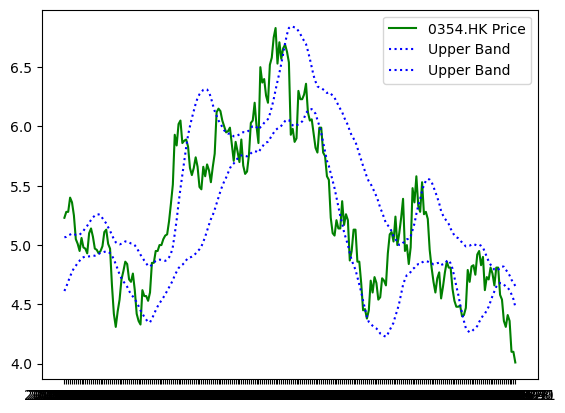

In [13]:
plt.plot(band_df['0354.HK'][500:], label='0354.HK Price', c='g')
# plt.plot(band_df['MA20'], label='MA20')
plt.plot(band_df['Upper Band'][500:], label='Upper Band', c='b', ls=':')
plt.plot(band_df['Lower Band'][500:], label='Lower Band', c='b', ls=':')
plt.legend()
plt.show()

In [14]:
rsi_df = pd.DataFrame(price_df['0354.HK'])

In [36]:
period = 14
rsi_df['Diff'] = rsi_df['0354.HK'].diff()
rsi_df['Gain'] = np.where(rsi_df['Diff'] > 0, rsi_df['Diff'], 0)
rsi_df['Loss'] = np.where(rsi_df['Diff'] < 0, -rsi_df['Diff'], 0)

In [37]:
rsi_df['Avg Gain'] = rsi_df['Gain'].rolling(period).mean()
rsi_df['Avg Loss'] = rsi_df['Loss'].rolling(period).mean()

In [38]:
rsi_df['RS'] = rsi_df['Avg Gain'] / rsi_df['Avg Loss']
rsi_df['RSI'] = 100 - 100 / (1 + rsi_df['RS'])

In [39]:
rsi_df['Avg Gain'].tail(20)

Date
2024-05-03    0.052857
2024-05-06    0.052857
2024-05-07    0.057857
2024-05-08    0.057857
2024-05-09    0.065000
2024-05-10    0.065000
2024-05-13    0.071429
2024-05-14    0.067143
2024-05-16    0.044286
2024-05-17    0.055000
2024-05-20    0.045714
2024-05-21    0.045000
2024-05-22    0.045000
2024-05-23    0.032857
2024-05-24    0.030714
2024-05-27    0.037857
2024-05-28    0.032857
2024-05-29    0.032857
2024-05-30    0.025000
2024-05-31    0.025000
Name: Avg Gain, dtype: float64

In [40]:
rsi_df['Avg Loss'].tail(20)

Date
2024-05-03    0.030000
2024-05-06    0.031429
2024-05-07    0.027857
2024-05-08    0.047857
2024-05-09    0.047857
2024-05-10    0.042857
2024-05-13    0.042857
2024-05-14    0.046429
2024-05-16    0.053571
2024-05-17    0.046429
2024-05-20    0.046429
2024-05-21    0.062857
2024-05-22    0.060000
2024-05-23    0.072857
2024-05-24    0.076429
2024-05-27    0.067857
2024-05-28    0.071429
2024-05-29    0.070000
2024-05-30    0.070000
2024-05-31    0.075000
Name: Avg Loss, dtype: float64

In [41]:
rsi_df['RSI']

Date
2021-06-01          NaN
2021-06-02          NaN
2021-06-03          NaN
2021-06-04          NaN
2021-06-07          NaN
                ...    
2024-05-27    35.810813
2024-05-28    31.506851
2024-05-29    31.944446
2024-05-30    26.315784
2024-05-31    25.000000
Name: RSI, Length: 738, dtype: float64

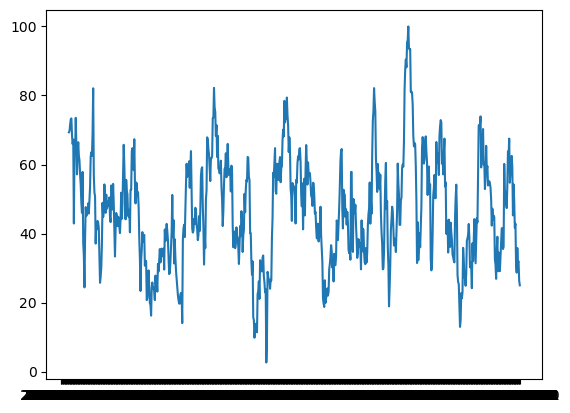

In [42]:
plt.plot(rsi_df['RSI'])
plt.show()

In [44]:
rsi2 = pd.DataFrame(price_df['0354.HK'])
rsi2['Diff'] = rsi_df['Diff']
rsi2['Gain'] = rsi_df['Gain']
rsi2['Loss'] = rsi_df['Loss']

In [50]:
rsi2['Avg Gain'] = np.nan
rsi2['Avg Loss'] = np.nan
first_avg_gain = rsi2['Gain'][:period].mean()
first_avg_loss = rsi2['Loss'][:period].mean()
rsi2['Avg Gain'][period - 1] = first_avg_gain
rsi2['Avg Loss'][period - 1] = first_avg_loss
for i in range(period, rsi2.shape[0]):
    rsi2['Avg Gain'][i] = ((period - 1) * rsi2['Avg Gain'][i - 1] + rsi2['Gain'][i]) / period
    rsi2['Avg Loss'][i] = ((period - 1) * rsi2['Avg Loss'][i - 1] + rsi2['Loss'][i]) / period

In [51]:
rsi2['RS'] = rsi2['Avg Gain'] / rsi2['Avg Loss']
rsi2['RSI'] = 100 - 100 / (1 + rsi2['RS'])

In [52]:
rsi2

,0354.HK,Diff,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
Date,,,,,,,,
2021-06-01,9.88,NaN,0.000000,0.00,NaN,NaN,NaN,NaN
2021-06-02,9.84,-0.040000,0.000000,0.04,NaN,NaN,NaN,NaN
2021-06-03,9.62,-0.220000,0.000000,0.22,NaN,NaN,NaN,NaN
2021-06-04,9.85,0.230000,0.230000,0.00,NaN,NaN,NaN,NaN
2021-06-07,10.94,1.089999,1.089999,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-05-27,4.41,0.100000,0.100000,0.00,0.042215,0.061589,0.685438,40.668258
2024-05-28,4.36,-0.050000,0.000000,0.05,0.039200,0.060761,0.645150,39.215261
2024-05-29,4.10,-0.260000,0.000000,0.26,0.036400,0.074992,0.485382,32.677254


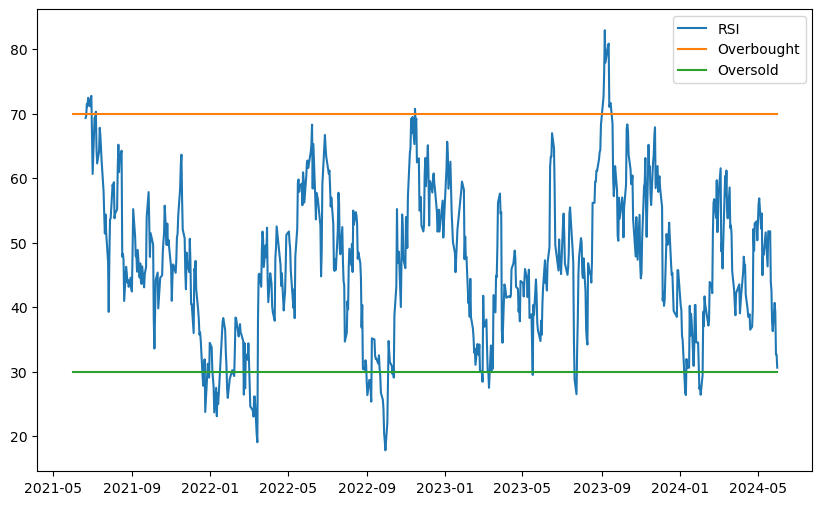

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(rsi2.index.values), rsi2['RSI'], label='RSI')
plt.plot(pd.to_datetime(rsi2.index.values), [70 for i in rsi2.index.values], label='Overbought')
plt.plot(pd.to_datetime(rsi2.index.values), [30 for i in rsi2.index.values], label='Oversold')

plt.legend()
plt.show()

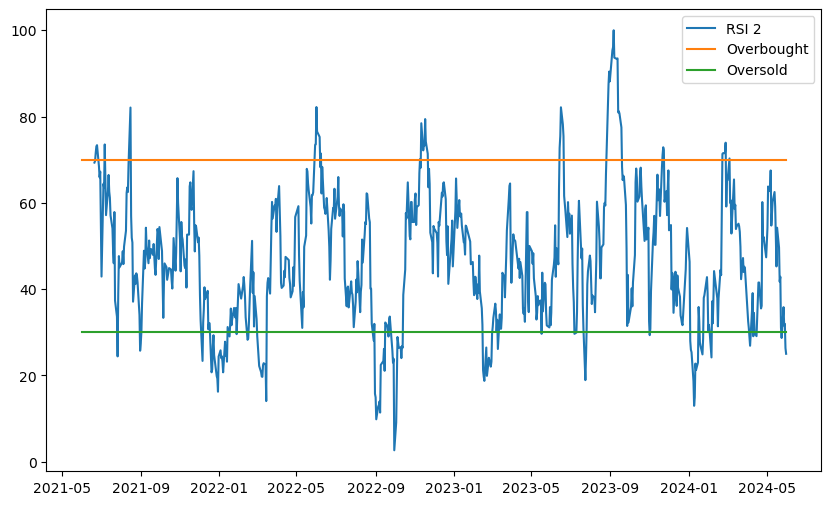

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(rsi_df.index.values), rsi_df['RSI'], label='RSI 2')
plt.plot(pd.to_datetime(rsi_df.index.values), [70 for i in rsi_df.index.values], label='Overbought')
plt.plot(pd.to_datetime(rsi_df.index.values), [30 for i in rsi_df.index.values], label='Oversold')

plt.legend()
plt.show()

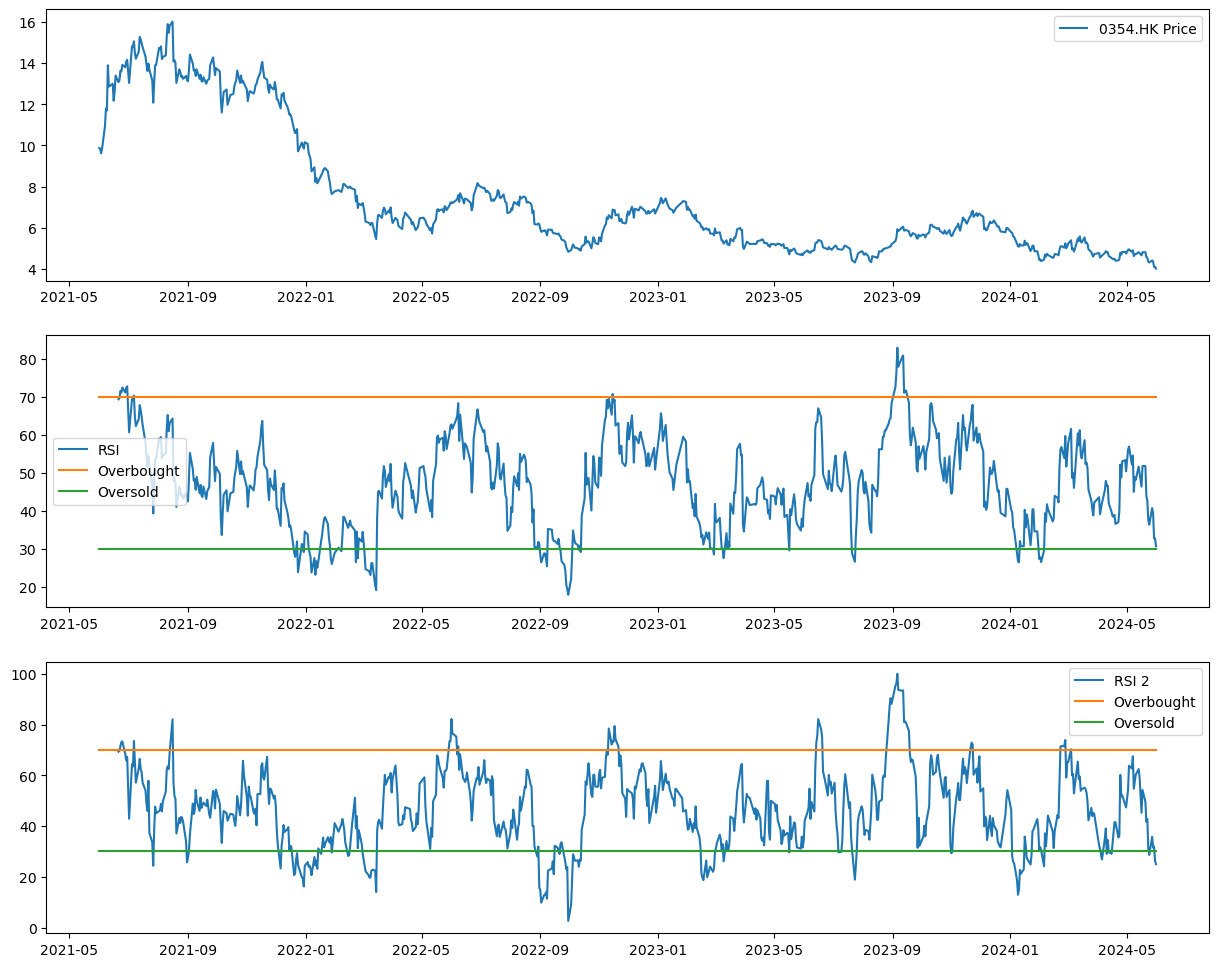

In [71]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(pd.to_datetime(band_df.index.values), band_df['0354.HK'], label='0354.HK Price')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(pd.to_datetime(rsi2.index.values), rsi2['RSI'], label='RSI')
plt.plot(pd.to_datetime(rsi2.index.values), [70 for i in rsi2.index.values], label='Overbought')
plt.plot(pd.to_datetime(rsi2.index.values), [30 for i in rsi2.index.values], label='Oversold')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(pd.to_datetime(rsi_df.index.values), rsi_df['RSI'], label='RSI 2')
plt.plot(pd.to_datetime(rsi_df.index.values), [70 for i in rsi_df.index.values], label='Overbought')
plt.plot(pd.to_datetime(rsi_df.index.values), [30 for i in rsi_df.index.values], label='Oversold')
plt.legend()
plt.show()


In [73]:
# macd
macd_df = pd.DataFrame(price_df['0354.HK'])
macd_df[f'EMA12'] = macd_df['0354.HK'].ewm(span=12, adjust=False).mean()
macd_df[f'EMA26'] = macd_df['0354.HK'].ewm(span=26, adjust=False).mean()
macd_df[f'MACD'] = macd_df['EMA12'] - macd_df[f'EMA26']
macd_df[f'Signal Line'] = macd_df[f'MACD'].ewm(span=9, adjust=False).mean()

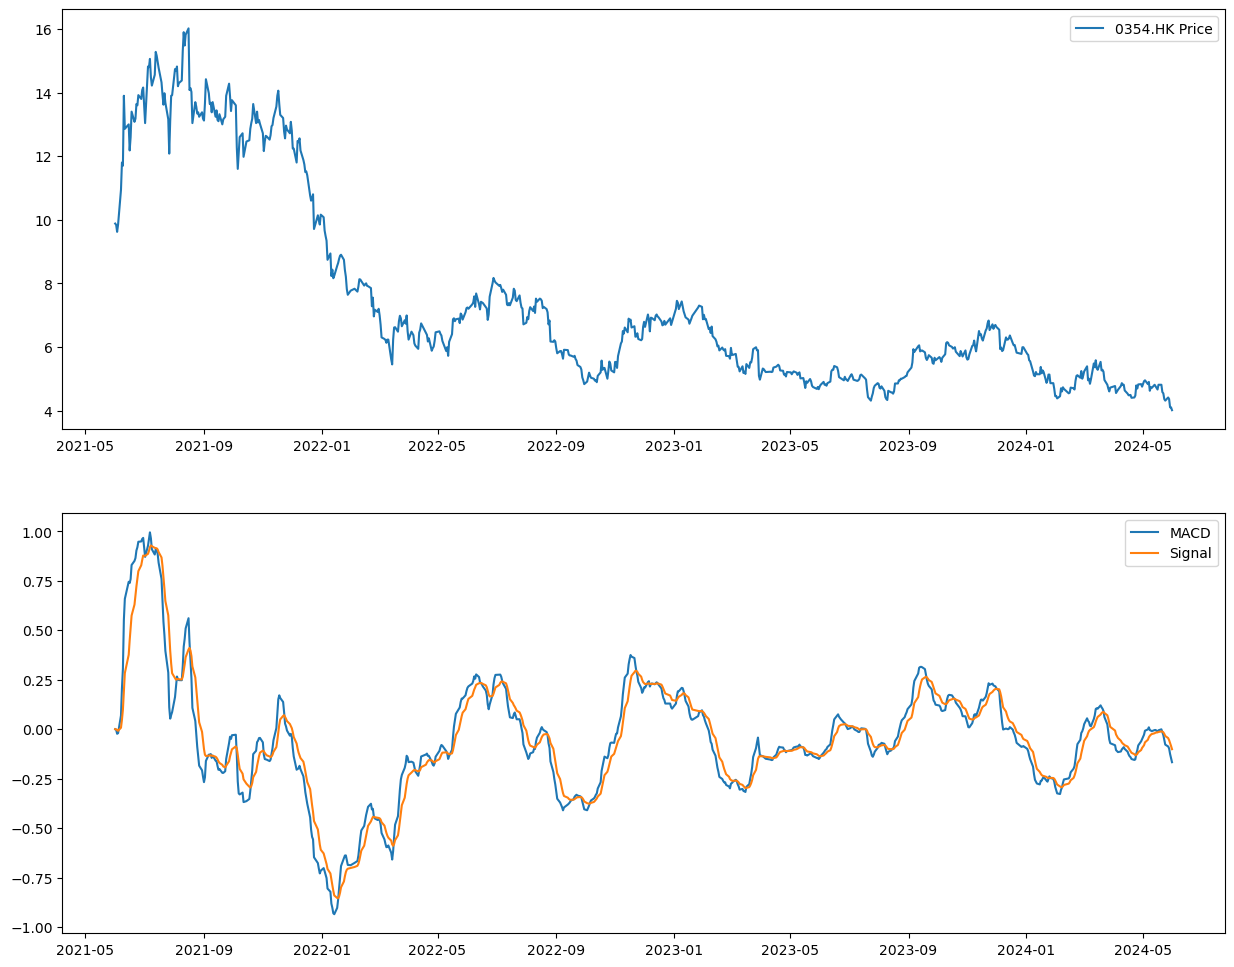

In [75]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)

plt.plot(pd.to_datetime(band_df.index.values), band_df['0354.HK'], label='0354.HK Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(pd.to_datetime(macd_df.index.values), macd_df['MACD'], label='MACD')
plt.plot(pd.to_datetime(macd_df.index.values), macd_df['Signal Line'], label='Signal')
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 738 entries, 2021-06-01 to 2024-05-31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   0354.HK      738 non-null    float64
 1   EMA12        738 non-null    float64
 2   EMA26        738 non-null    float64
 3   MACD         738 non-null    float64
 4   Signal Line  738 non-null    float64
dtypes: float64(5)
memory usage: 50.8+ KB
